In [32]:
%%time
%load_ext autoreload

from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "/Users/Akshay/Documents/tRNAShuffle/data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))
    
#Experimentally obtained codon usage frequencies and tRNA abundances at growth rate = 2.5 dbl/hr
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 1min 1s, sys: 640 ms, total: 1min 1s
Wall time: 1min 2s


In [ ]:
#Wildtype

tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


##Compute the elongation latency of each gene weighted by transcript number
pCodon_zeros= np.zeros(len(gr25_pCodon))
codon_elongation_latency = list()
for i in range(len(pCodon_zeros)):
    pCodon_zeros= np.zeros(len(gr25_pCodon))
    pCodon_zeros[i] = 1
    codon_elongation_latency.append(computeElongationLatency(gr25_ptRNA,pCodon_zeros,ensmbl_latency_dict)[0][0])
codon_elongt = dict(zip(codon_tags, codon_elongation_latency))
gene_latency = compute_gene_elongt(codon_elongt)


transcriptome = pd.read_csv('./data/tables/srep45303-s9.csv')
transcriptome = transcriptome.head(4196)
transcriptome_dict = dict(zip(transcriptome['gene_name'],transcriptome['baseMean']))
transcriptome_codon_dict = dict(zip(codon_tags,np.zeros(62)))
transcriptome_elongt = list()
failed_counter = 0
gene_map = get_gene_map()
for gene in transcriptome_dict:
    try:
        for i in range(round(transcriptome_dict[gene])):
            transcriptome_elongt.append(gene_latency[gene])
            for codon in gene_map[gene]:
                transcriptome_codon_dict[codon] += 1
    except:
        failed_counter+=1
pCodon_transcriptome = [transcriptome_codon_dict[gene]/sum(transcriptome_codon_dict.values()) for gene in transcriptome_codon_dict]


ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

fig,ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(62),pCodon_sorted,color='#d8832b',width=0.8)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax.set_xlim(-2,62)
ax.set_ylabel('Codon frequency',fontsize=25)


## Sort tRNA distribution per codon
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_sorted = [sum([ptRNA_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]

fig,ax1 = plt.subplots(figsize=(12,4))
ax1.bar(np.arange(62),ptRNA_sorted,color='#39568CFF',width=0.8)
ax1.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax1.set_xlim(-2,62)
ax1.set_ylabel('tRNA frequency',fontsize=25)

248.8771055616273


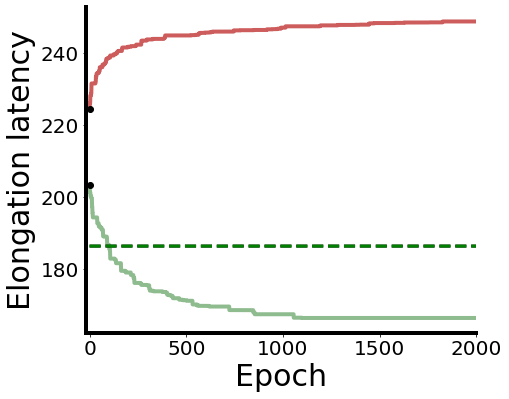

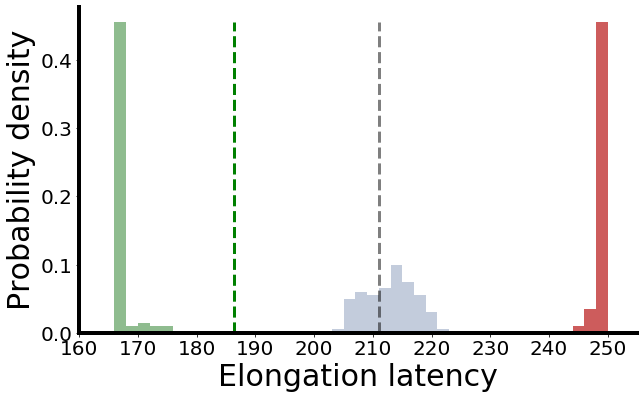

In [28]:
import matplotlib.pyplot as plt
import numpy as np

####Plot GA trajectory for both fast and slow
fullelongt = np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_fullelongt.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='darkseagreen')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='black',linestyle='dashed')
ax.set_xlim(-20,len(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

fullelongt = np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_slowtRNA_fullelongt.npy')
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='indianred')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='green',linestyle='dashed')
print(max(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency',fontsize=30)
ax.set_xlabel('Epoch',fontsize=30)

####Plot final populations for fast and slow
fig,ax = plt.subplots(figsize=(10,6))

elongt_list=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_elongt.npy')
hist=ax.hist(elongt_list,15,range=(164,194),color='darkseagreen',density=True)

elongt_list=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_slowtRNA_elongt.npy')
hist=ax.hist(elongt_list,15,range=(240,270),color='indianred',density=True)

ax.plot([211]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green',linestyle='dashed')

elongt_list = np.load('./data/UniformRandomtRNA_WTCodonUsage_100sample_elongt.npy')
hist=ax.hist(elongt_list,15,range = (195,225),color='#39568CFF',density=True,alpha=0.3)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency',fontsize=30)
    ax.set_xlim(160,255)
    ax.set_xticks(np.arange(160,260,10))

211.4636624866501


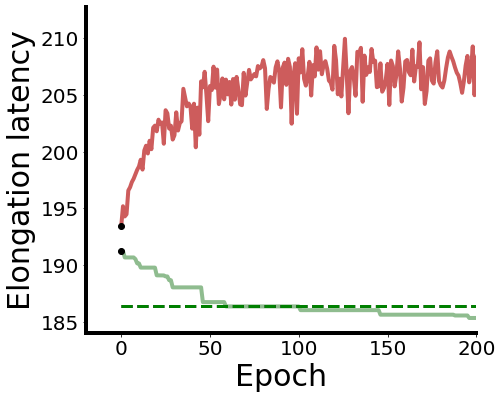

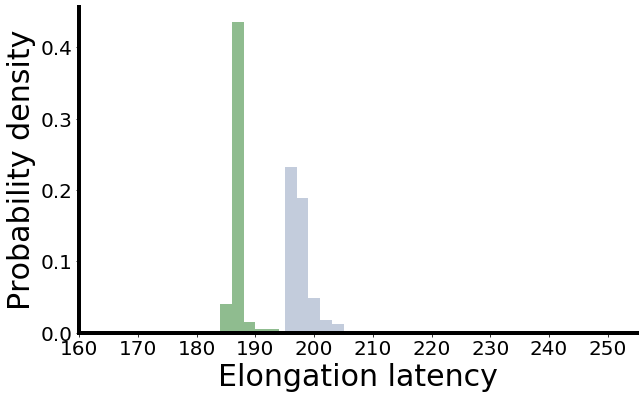

In [30]:
import matplotlib.pyplot as plt
import numpy as np

####Plot GA trajectory for both fast and slow
fullelongt = np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_fastCodonUsage_fullelongt.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='darkseagreen')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='black',linestyle='dashed')
ax.set_xlim(-20,len(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

fullelongt = np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_slowCodonUsage_fullelongt.npy')
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='indianred')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='green',linestyle='dashed')
print(max(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency',fontsize=30)
ax.set_xlabel('Epoch',fontsize=30)

####Plot final populations for fast and slow
fig,ax = plt.subplots(figsize=(10,6))

elongt_list=np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_fastCodonUsage_elongt.npy')
hist=ax.hist(elongt_list,15,range=(164,194),color='darkseagreen',density=True)

elongt_list=np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_slowCodonUsage_elongt.npy')
hist=ax.hist(elongt_list,15,range=(240,270),color='indianred',density=True)

ax.plot([211]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green',linestyle='dashed')

elongt_list = np.load('./data/WTtRNA_UniformRandomCodonUsage_100sample_elongt.npy')
hist=ax.hist(elongt_list,15,range = (195,225),color='#39568CFF',density=True,alpha=0.3)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency',fontsize=30)
    ax.set_xlim(160,255)
    ax.set_xticks(np.arange(160,260,10))